In [41]:
import pandas as pd
import os

os.getcwd()

'/Users/andrew/Desktop/Projects/Game_Recommender'

In [42]:
df1 = pd.read_csv("/Users/andrew/Desktop/Projects/Game_Recommender/raw_data.csv")

print(df1.head())

                          Name                               Genres  \
0           Grand Theft Auto V   ['Shooter', 'Racing', 'Adventure']   
1     The Witcher 3: Wild Hunt  ['Role-playing (RPG)', 'Adventure']   
2                     Portal 2  ['Platform', 'Puzzle', 'Adventure']   
3  The Elder Scrolls V: Skyrim  ['Role-playing (RPG)', 'Adventure']   
4                       Portal    ['Shooter', 'Platform', 'Puzzle']   

                  Developers  \
0         ['Rockstar North']   
1         ['CD Projekt RED']   
2                  ['Valve']   
3  ['Bethesda Game Studios']   
4                  ['Valve']   

                                          Publishers     Rating  Rating Count  \
0         ['Take-Two Interactive', 'Rockstar Games']  88.841678          5159   
1  ['WB Games', 'cdp.pl', 'Spike Chunsoft', 'Band...  92.858638          4701   
2                       ['Valve', 'Electronic Arts']  92.004895          3957   
3                             ['Bethesda Softworks']  83

In [ ]:
# a lot of our list columns have brackets and quotations; let's remove them
columns_to_clean = ['Genres', 'Developers', 'Publishers', 'Platforms', 'Release Years', 'Game Modes', 'Themes']

for col in columns_to_clean:
    df1[col] = df1[col].astype(str).str.replace(r"[\[\]']", "", regex=True) 
    df1[col] = df1[col].str.strip()  # removing leading/trailing spaces

print(df1.head())
df1.to_csv("cleaned_data.csv", index=False)


                          Name                         Genres  \
0           Grand Theft Auto V     Shooter, Racing, Adventure   
1     The Witcher 3: Wild Hunt  Role-playing (RPG), Adventure   
2                     Portal 2    Platform, Puzzle, Adventure   
3  The Elder Scrolls V: Skyrim  Role-playing (RPG), Adventure   
4                       Portal      Shooter, Platform, Puzzle   

              Developers                                         Publishers  \
0         Rockstar North               Take-Two Interactive, Rockstar Games   
1         CD Projekt RED  WB Games, cdp.pl, Spike Chunsoft, Bandai Namco...   
2                  Valve                             Valve, Electronic Arts   
3  Bethesda Game Studios                                 Bethesda Softworks   
4                  Valve                             Valve, Electronic Arts   

      Rating  Rating Count                                          Platforms  \
0  88.841678          5159  PlayStation 3, PlayStatio

In [44]:
df = pd.read_csv("cleaned_data.csv")

In [ ]:
# How many rows and columns do we have?
print(df.shape)

(30000, 10)


In [46]:
# Searching for nulls

print(df.isnull().sum())

Name                0
Genres            718
Developers       4084
Publishers       3758
Rating              0
Rating Count        0
Platforms         394
Release Years     425
Game Modes       1948
Themes           5188
dtype: int64


In [47]:
# Because a lot of our data points that have at least one null value are still considered important
# for analysis, we shall decide to fill the missing values with placeholders instead of removing them.
df['Genres'] = df['Genres'].fillna('Unknown')
df['Developers'] = df['Developers'].fillna('Unknown')
df['Publishers'] = df['Publishers'].fillna('Unknown')
df['Platforms'] = df['Platforms'].fillna('Unknown')
df['Release Years'] = df['Release Years'].fillna('Unknown')
df['Game Modes'] = df['Game Modes'].fillna('Unspecified')
df['Themes'] = df['Themes'].fillna('Unspecified')

print(df.isnull().sum())


Name             0
Genres           0
Developers       0
Publishers       0
Rating           0
Rating Count     0
Platforms        0
Release Years    0
Game Modes       0
Themes           0
dtype: int64


In [48]:
print("Summary of numerical columns:")
print(df.describe())


Summary of numerical columns:
             Rating  Rating Count
count  30000.000000  30000.000000
mean      68.432744     31.464833
std       13.719534    138.088323
min        0.000000      0.000000
25%       60.000000      1.000000
50%       70.000000      5.000000
75%       78.832152     16.000000
max      100.000000   5159.000000


In [49]:
print("Data types:")
print(df.dtypes)


Data types:
Name              object
Genres            object
Developers        object
Publishers        object
Rating           float64
Rating Count       int64
Platforms         object
Release Years     object
Game Modes        object
Themes            object
dtype: object


Top 10 genres:
Genres
Adventure             12559
Indie                 10572
Role-playing (RPG)     6363
Strategy               5750
Simulator              5476
Shooter                5030
Puzzle                 4580
Platform               3909
Arcade                 3525
Sport                  2467
Name: count, dtype: int64


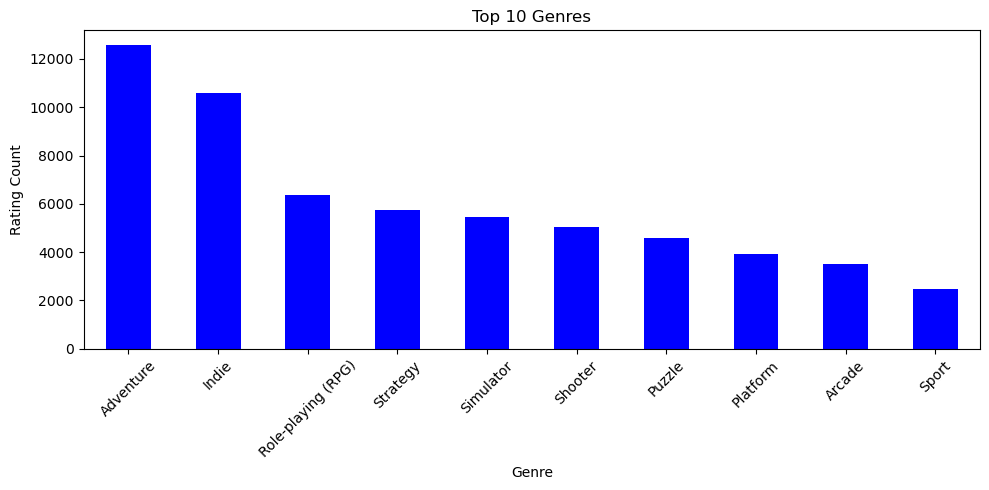

In [50]:
# Let's see what the top 10 genres are. 
# Check if the game has the genre name in it, use value_counts() 
genre_series = df['Genres'].dropna().str.split(', ')
flat_genres = genre_series.explode()
top_genres = flat_genres.value_counts().head(10)

print("Top 10 genres:")
print(top_genres)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
top_genres.plot(kind='bar', title='Top 10 Genres', color='blue')
plt.ylabel("Rating Count")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Looking at this, it's clear that adventure is the genre most seen in games on igdb. then, do the top rated (in terms of count) games share similar genres? 

Top genres among the 500 most-rated games:
Genres
Adventure                      335
Shooter                        198
Role-playing (RPG)             151
Puzzle                          89
Platform                        79
Indie                           62
Strategy                        50
Simulator                       38
"Hack and slash/Beat em up"     37
Turn-based strategy (TBS)       33
Name: count, dtype: int64


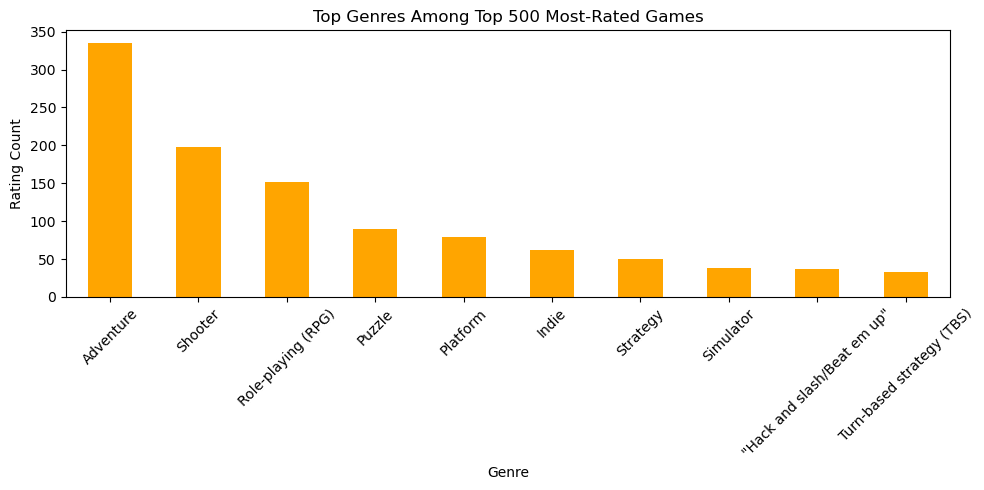

In [51]:
# Get top 500 games by rating count
top_count_games = df.sort_values(by='Rating Count', ascending=False).head(500)

# Same thing as previous
top_genres_series = top_count_games['Genres'].dropna().str.split(', ')
top_flat_genres = top_genres_series.explode()
top_count_genres = top_flat_genres.value_counts().head(10)

print("Top genres among the 500 most-rated games:")
print(top_count_genres)

plt.figure(figsize=(10, 5))
top_count_genres.plot(kind='bar', title='Top Genres Among Top 500 Most-Rated Games', color='orange')
plt.ylabel("Rating Count")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Here it appears that adventure consistently does well, meaning it's a genre most commonly seeked out by players. it also seems that shooters tend to be much more consistently
popular than indie games, judging by the drop in rating count for indie games and the more highly-stabilized rating count for shooters. this makes sense, as people who enjoy shooters
generally can move smoothly from shooter to shooter, while indie games can generally be a hit or miss. but how do the overall ratings for each genre compare?

Average rating by genre:
Genres
Turn-based strategy (TBS)      73.402205
Tactical                       73.092607
Visual Novel                   71.976701
Role-playing (RPG)             70.586493
Point-and-click                70.508533
Pinball                        70.415703
Real Time Strategy (RTS)       70.291262
Puzzle                         70.160938
Platform                       70.038602
Music                          69.913423
Adventure                      69.350925
Card & Board Game              69.287725
Arcade                         69.224351
"Hack and slash/Beat em up"    69.107565
Strategy                       69.019421
Name: Rating, dtype: float64


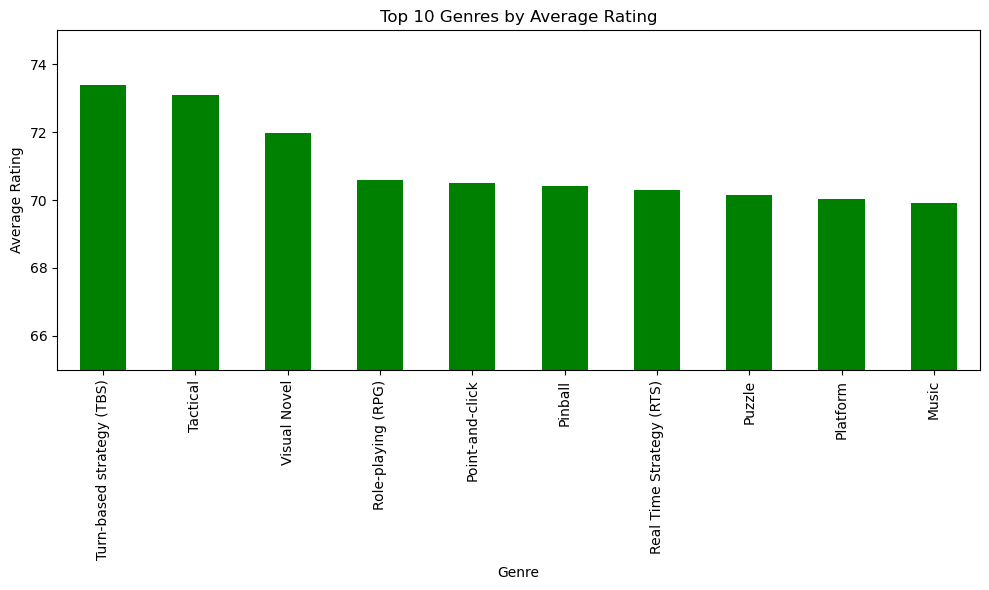

In [52]:
df_genres = df.copy()
df_genres['Genres'] = df_genres['Genres'].str.split(', ')
df_genres = df_genres.explode('Genres')

# Removing unknown genres
df_genres = df_genres[df_genres['Genres'] != 'Unknown']

# Grouping by genre and computing average rating
avg_rating_by_genre = df_genres.groupby('Genres')['Rating'].mean().sort_values(ascending=False)

print("Average rating by genre:")
print(avg_rating_by_genre.head(15))

plt.figure(figsize=(10, 6))
plt.ylim(65, 75)
avg_rating_by_genre.head(10).plot(kind='bar', color='green')
plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


Here the results are a bit different: Average rating is highest for turn-based strategy and tactical games, while adventure falls down past the top 10 genres. As
it is known that the correlation between rating count and rating is very weak, we can see that despite adventure being among the most top-played games, it's not necessarily
the most enjoyed by players compared to TBS and tactical games. This must mean that there is high potential for TBS/tactical games to have hidden gems (games that are not as popular, but still highly enjoyed). Let's look a little further into the cross-comparison between genre popularity and quality, because they can shed light on some underrepresented game themes that are enjoyed by players versus those that aren't. We can split these insights into 4 categories: popular + highly rated, niche + highly rated (hidden gems), popular + average, niche + poorly rated.

Category
Popular + High Rated (Mainstream)    8
Niche + Low Rated                    7
Popular + Mid Rated                  4
Niche + High Rated (Hidden Gem)      4
Name: count, dtype: int64


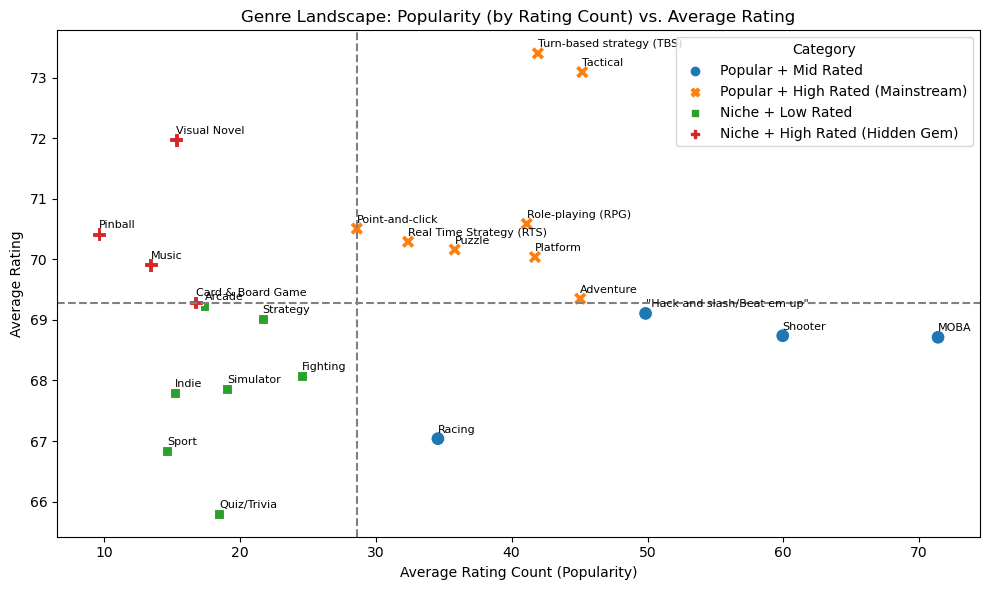

In [53]:
import seaborn as sns

df_exploded = df.copy()
df_exploded['Genres'] = df_exploded['Genres'].str.split(', ')
df_exploded = df_exploded.explode('Genres')

# Removing unknown genres
df_exploded = df_exploded[df_exploded['Genres'] != 'Unknown']

# Computing ARC (Average rating count) per genre
genre_avg_rating_count = df_exploded.groupby('Genres')['Rating Count'].mean()


# Average rating per genre
genre_avg_rating = df_exploded.groupby('Genres')['Rating'].mean()

# Combining into one DataFrame
genre_summary = pd.DataFrame({
    'Avg Rating Count': genre_avg_rating_count,
    'Avg Rating': genre_avg_rating
}).dropna()

# Here we define the classification function
# Thresholds for classification
count_threshold = genre_summary['Avg Rating Count'].median()
rating_threshold = genre_summary['Avg Rating'].median()

def classify_genre(row):
    if row['Avg Rating Count'] >= count_threshold and row['Avg Rating'] >= rating_threshold:
        return 'Popular + High Rated (Mainstream)'
    elif row['Avg Rating Count'] < count_threshold and row['Avg Rating'] >= rating_threshold:
        return 'Niche + High Rated (Hidden Gem)'
    elif row['Avg Rating Count'] >= count_threshold and row['Avg Rating'] < rating_threshold:
        return 'Popular + Mid Rated'
    else:
        return 'Niche + Low Rated'

genre_summary['Category'] = genre_summary.apply(classify_genre, axis=1)


# How many genres fall into each group?
print(genre_summary['Category'].value_counts())

genre_summary.sort_values(by='Avg Rating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=genre_summary,
    x='Avg Rating Count',
    y='Avg Rating',
    hue='Category',
    style='Category',
    s=100
)
plt.axvline(count_threshold, color='gray', linestyle='--')
plt.axhline(rating_threshold, color='gray', linestyle='--')
plt.title("Genre Landscape: Popularity (by Rating Count) vs. Average Rating")
plt.xlabel("Average Rating Count (Popularity)")
plt.ylabel("Average Rating")
plt.legend(title='Category')

# Genre labels
for i in genre_summary.index:
    x = genre_summary.loc[i, 'Avg Rating Count']
    y = genre_summary.loc[i, 'Avg Rating']
    plt.text(x, y + 0.1, i, fontsize=8)

plt.tight_layout()
plt.show()



Here we see each genre grouped into 4 categories, indicated by the relationship between their average ratings and average rating count, which we'll call ARC. The ARC is important in determining the amount of engagement seen in the genre. For example, it makes sense that MOBAs have the highest engagement but would probably be less highly-rated than TBS and tactical games, which are more traditionally enjoyed. This shows where a lot of consumer interest lies; and while adventure is stuck right in the middle of the chart, this makes sense as it is the most frequent and diverse genre as seen earlier. However, what will make these insights more interesting is where they intersect with game themes, which will be important for understanding overlapping consumer interests.

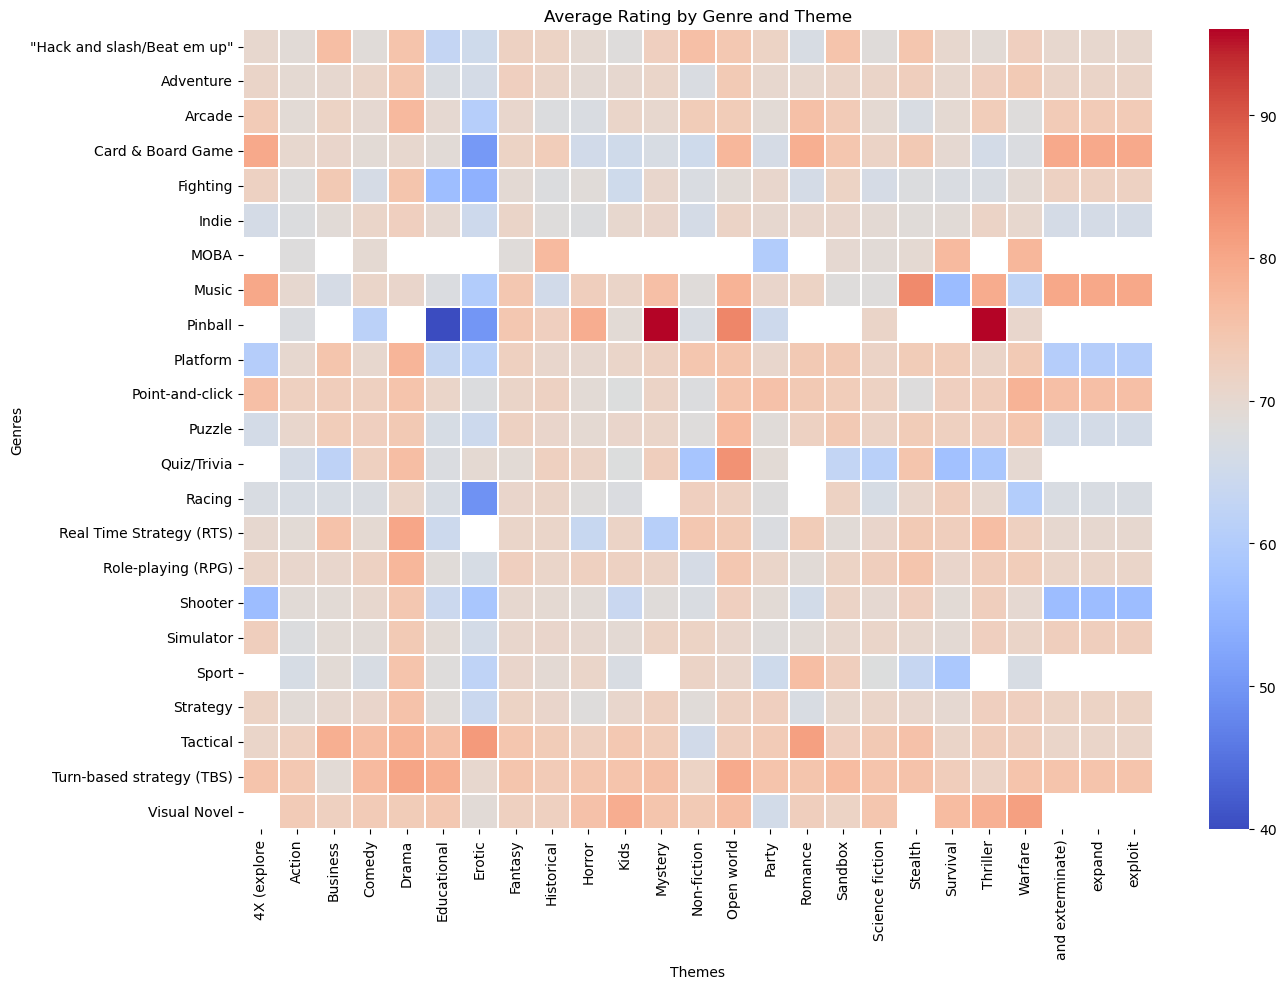

In [54]:
df_theme = df.copy()
# Combination of two categories! 
df_theme['Genres'] = df_theme['Genres'].str.split(', ')
df_theme['Themes'] = df_theme['Themes'].str.split(', ')
df_theme = df_theme.explode('Genres').explode('Themes')

df_theme = df_theme[(df_theme['Genres'] != 'Unknown') & (df_theme['Themes'] != 'Unspecified')]

grouped_gt = df_theme.groupby(['Genres', 'Themes']).agg({
    'Rating': 'mean',
    'Rating Count': 'mean',
    'Name': 'count' 
}).rename(columns={
    'Rating': 'Avg Rating',
    'Rating Count': 'Avg Rating Count',
    'Name': 'Game Count'
}).reset_index()

pivot = grouped_gt.pivot_table(values='Avg Rating', index='Genres', columns='Themes')
plt.figure(figsize=(14, 10))
sns.heatmap(pivot, cmap='coolwarm', linewidths=0.3)
plt.title("Average Rating by Genre and Theme")
plt.tight_layout()
plt.show()


Very interesting results here. Let's first take a look at all of the genres. We'll start with Adventure, which can be considered a baseline as the genre is shaded relatively similarly no matter the theme. This indicates that Adventure generally performs well across the board, and that players may find more interest in the core experience of the genre rather than its specific theme. 

This contrasts significantly with genres such as Pinball, which appears to strongly depend on Mystery and Thriller elements to perform well and reject Educational and Erotic themes. This makes sense as Pinball enjoyers might tend to prefer environments of suspense and tension-building gameplay. As this characteristic of hot-cold fluctuations is shared with Shooter and Racing games, theme pairing appears to matter much more significantly among these genres. Therefore, when creating or choosing games in these genres it would be wise to coordinate around higher-performing themes. 

Next let's point out some interesting findings from themes. Similar to how Adventure performed for genres, we can see that Fantasy, Open World, and Drama, with their frequent warm-reddish tones, generally perform well, regardless of genre. This indicates that these themes are universal crowd-pleasers, and it may be a good idea to indulge in these themes no matter what type of game is being created or played. Erotic themes appear to be the most lowly rated no matter the genre, contributing to the overall notion that incorporating them are highly risky for satisfaction and performance, unless targeting niche audiences.

Next, we'll see how video game platforms correlate with consumer activity. Which gaming platforms see more player engagement for each genre?

Platforms
PC (Microsoft Windows)    23.23
Mac                        7.89
PlayStation 4              7.30
Nintendo Switch            6.56
Xbox One                   6.23
Linux                      4.79
iOS                        3.84
Android                    3.05
PlayStation 3              2.93
PlayStation 5              2.82
Name: count, dtype: float64


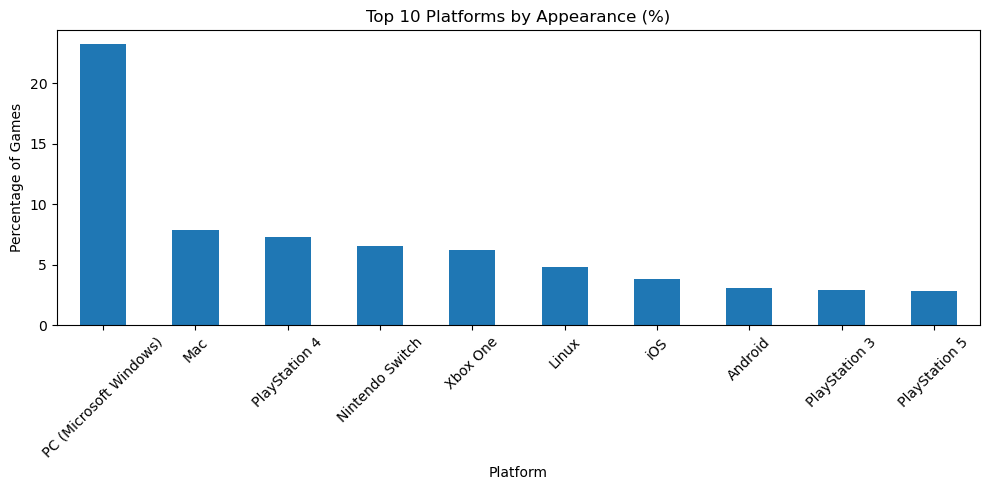

In [55]:
df_platforms = df.copy()
df_platforms['Platforms'] = df_platforms['Platforms'].str.split(', ')
df_platforms = df_platforms.explode('Platforms')

# Counting frequency of each platform
platform_counts = df_platforms['Platforms'].value_counts()

# Converting to percentage (to see how much of market a platform takes up)
platform_proportions = (platform_counts / platform_counts.sum()) * 100

platform_proportions = platform_proportions.round(2).sort_values(ascending=False)
print(platform_proportions.head(10))  # top 10 most common platforms

platform_proportions.head(10).plot(kind='bar', figsize=(10, 5), title='Top 10 Platforms by Appearance (%)')
plt.ylabel('Percentage of Games')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Clearly Windows receives the most love from video game developers, rising above all other platforms with the most representation in developers' games. This means that PC appears to have the highest priority for gaming releases for the general gaming world. However, this only speaks on the developers' side of video game representation. How much engagement do we see for these platforms, especially for each genre? 

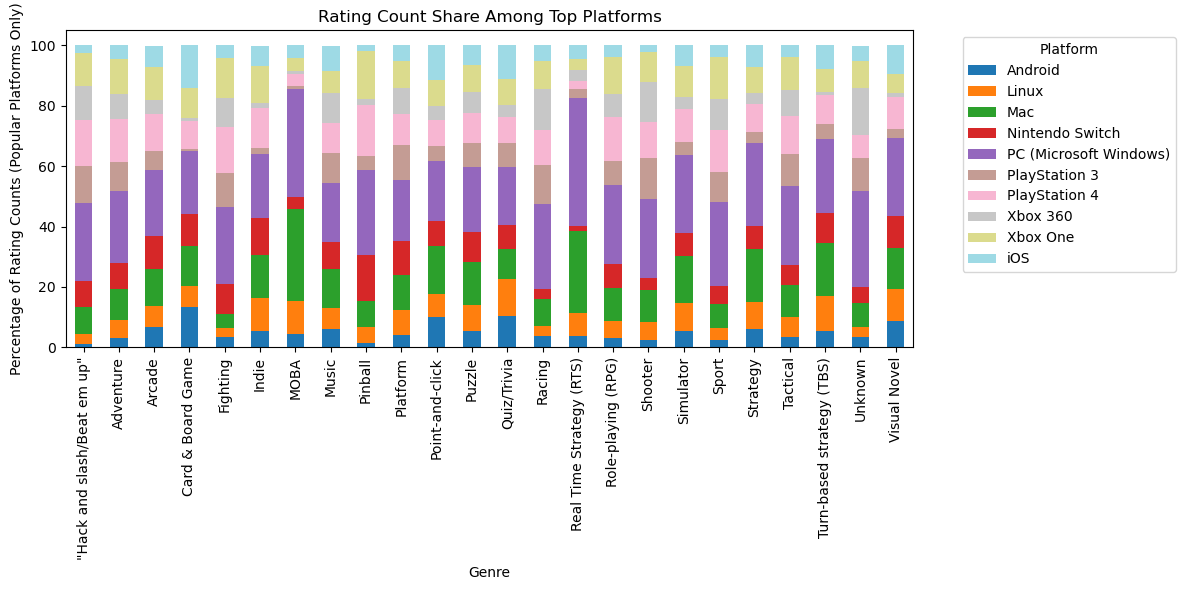

In [56]:
df_exploded = df.copy()
df_exploded['Genres'] = df_exploded['Genres'].str.split(', ')
df_exploded['Platforms'] = df_exploded['Platforms'].str.split(', ')
df_exploded = df_exploded.explode('Genres').explode('Platforms')

# Getting total rating count per platform across all genres
platform_rating_totals = df_exploded.groupby('Platforms')['Rating Count'].sum()
platform_rating_proportions = (platform_rating_totals / platform_rating_totals.sum()) * 100

# Uncommon platforms not to be included (less than 5%)
popular_platforms = platform_rating_proportions[platform_rating_proportions >= 3].index.tolist()
df_exploded['Platform Grouped'] = df_exploded['Platforms'].apply(lambda x: x if x in popular_platforms else 'Other')

# Sum rating count by Genre + Platform Grouped
genre_platform_rating = df_exploded.groupby(['Genres', 'Platform Grouped'])['Rating Count'].sum().reset_index()

# Normalizing within each genre
genre_totals = genre_platform_rating.groupby('Genres')['Rating Count'].transform('sum')
genre_platform_rating['Percentage'] = (genre_platform_rating['Rating Count'] / genre_totals) * 100
genre_platform_rating['Percentage'] = genre_platform_rating['Percentage'].round(2)

top_genres_by_rating = df_exploded.groupby('Genres')['Rating Count'].sum().sort_values(ascending=False).head(10).index
filtered = genre_platform_rating[genre_platform_rating['Genres'].isin(top_genres_by_rating)]

pivot_rating = filtered.pivot(index='Genres', columns='Platform Grouped', values='Percentage').fillna(0)

# Removing 'Other'
popular_only = genre_platform_rating[genre_platform_rating['Platform Grouped'] != 'Other'].copy()

genre_totals_popular = popular_only.groupby('Genres')['Rating Count'].transform('sum')
popular_only['Percentage'] = (popular_only['Rating Count'] / genre_totals_popular) * 100
popular_only['Percentage'] = popular_only['Percentage'].round(2)

pivot_popular = popular_only.pivot(index='Genres', columns='Platform Grouped', values='Percentage').fillna(0)
pivot_popular.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Rating Count Share Among Top Platforms')
plt.ylabel('Percentage of Rating Counts (Popular Platforms Only)')
plt.xlabel('Genre')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Here we see a more specific split of most commonly engaged platforms for each genre. PC and Mac see the highest splits for MOBAs and RTS games, which can make sense given that it may be more difficult to design massive servers for online and real-time gameplay on different consoles. Additionally, we see a much more diverse set of rating counts among the genres for the Nintendo Switch. While saturation is a factor to consider, there is the least engagement seen in racing and shooter games compared to other genres for Nintendo Switch, which implies that it may be more difficult to find engagement developing for the specific console compared to others. 

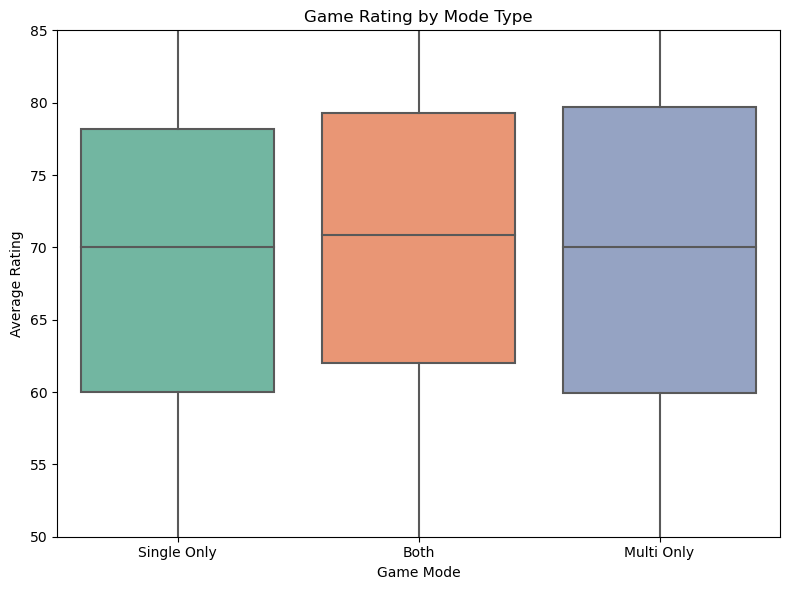

ANOVA F-statistic: 41.35, p-value: 0.0000


In [58]:
df_mode = df.copy()
df_mode['Game Modes'] = df_mode['Game Modes'].str.split(', ')
df_mode = df_mode.explode('Game Modes')

# Here we tag rows with either Single or Multiplayer if option(s) exists
df_mode['Single_Player'] = df_mode['Game Modes'].str.contains('Single player', case=False)
df_mode['Multi_Player'] = df_mode['Game Modes'].str.contains('Multiplayer|Online Co-operative|Co-operative', case=False)

# New aggregation with tagged types
game_mode_summary = df_mode.groupby('Name').agg({
    'Single_Player': 'max',
    'Multi_Player': 'max',
    'Rating': 'first',
    'Rating Count': 'first'
}).reset_index()

# Labeling mode type
def label_mode(row):
    if row['Single_Player'] and row['Multi_Player']:
        return 'Both'
    elif row['Single_Player']:
        return 'Single Only'
    elif row['Multi_Player']:
        return 'Multi Only'
    else:
        return 'Other'

game_mode_summary['Mode Type'] = game_mode_summary.apply(label_mode, axis=1)

# Filtering out ambiguous cases
game_mode_summary = game_mode_summary[game_mode_summary['Mode Type'] != 'Other']

plt.figure(figsize=(8, 6))
sns.boxplot(data=game_mode_summary, x='Mode Type', y='Rating', palette='Set2')
plt.ylim(50, 85)
plt.title('Game Rating by Mode Type')
plt.ylabel('Average Rating')
plt.xlabel('Game Mode')
plt.tight_layout()
plt.show()

# Do ANOVA tests support these findings? 
from scipy.stats import f_oneway

single = game_mode_summary[game_mode_summary['Mode Type'] == 'Single Only']['Rating']
multi = game_mode_summary[game_mode_summary['Mode Type'] == 'Multi Only']['Rating']
both = game_mode_summary[game_mode_summary['Mode Type'] == 'Both']['Rating']

f_stat, p_val = f_oneway(single, multi, both)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


According to this box plot, players seem to have more enjoyment in games that contain multiplayer options. While the difference is only 2-3% between the "Single Only" and "Both Game Mode" groups, with "Multi Only" finding itself around a similar value as the latter, we see a highly significant value to indicate that there is consistency in these average ratings among the categories. This does make theoretical sense, as people tend to enjoy flexibility in choosing their mode of playing, and having the option to play alone versus with other people provides different perspectives of playing, which can lead to more overall enjoyment. Additionally, games that contain both modes would be more likely to have a greater amount of money, time, and resources to be invested in their creation, as opposed to single-only games which may fluctuate greatly in this aspect. Lastly, those who enjoy multiplayer-only games are more likely to enjoy games anyway when they're playing alongside their friends due to mutually shared company and entertainment. 